# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing data to understand its main characteristics. It is essential for data scientists to make informed decisions about the next steps in their analysis. This process usually includes descriptive statistics and data visualization.

## Dataset Fuel Consumption Description

The table below shows the fuel usage rates and estimated Carbon Dioxide emissions for light-duty vehicles in Canada in 2022.
* `Make`: Car Brand
* `Model`: Car Model
* `Vehicle Class`: Vehicle Type or Class
* `Engine Size(L)`: Engine Size
* `Cylinders`: Number of *cylinder* in Machine
* `Transmission`: Car Transmission Type
* `Fuel Type`: Fuel Type
* `Fuel Consumption (City (L/100 km)`: Average Fuel Consumption in Urban
* `Fuel Consumption(Hwy (L/100 km))`: Average Fuel Consumption in Highway
* `Fuel Consumption(Comb (L/100 km))`: Average Fuel Consumption in Urban and Highway
* `CO2 Emissions(g/km)`: Carbon dioxide (in g/km) for city and highway driving combined
* `CO2 Rating`: Carbon Dioxide Emission on a Scale 1 (Worst) to 10 (Best)
* `Smog Rating`: Emissions of Smog-forming Pollutants on a Scale from 1 (Worst) to 10 (Best)
* `Region` : Car Brand Region


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [4]:
df = pd.read_csv('FuelConsumptionCO2.csv')

In [3]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 946
Jumlah atribut: 14


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Region
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,200,6,3,Asia
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,263,4,5,Asia
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,232,5,6,Asia
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,242,5,6,Asia
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,230,5,7,Asia


In [4]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Make                               946 non-null    object 
 1   Model                              946 non-null    object 
 2   Vehicle Class                      946 non-null    object 
 3   Engine Size(L)                     946 non-null    float64
 4   Cylinders                          946 non-null    int64  
 5   Transmission                       946 non-null    object 
 6   Fuel Type                          946 non-null    object 
 7   Fuel Consumption (City (L/100 km)  946 non-null    float64
 8   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 9   Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 10  CO2 Emissions(g/km)                946 non-null    int64  
 11  CO2 Rating                         946 non-null    int64  

In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,12.506448,9.363319,11.092072,259.172304,4.539112,4.950317
std,1.374814,1.932670,3.452043,2.285125,2.876276,64.443149,1.471799,1.679842
min,1.200000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,213.250000,3.000000,3.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,257.000000,5.000000,5.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,300.750000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,10.000000,7.000000


In [6]:
df.describe(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type,Region
count,946,946,946,946,946,946
unique,39,715,14,23,4,3
top,Ford,Silverado 4WD Mud Terrain Tire,SUV: Small,AS8,Z,Europe
freq,89,5,197,212,458,352


# Descriptive Statistics
There are many types of measures that can be applied to descriptive statistics.

Based on the material from StatProb, these include:
1. Central tendency (mean, median, mode)
2. Dispersion or variability (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency is often used to observe data distribution.**
Typically, the mean is more suitable for a normal distribution (which looks symmetric in the middle), while the median is better for skewed distributions. Of course, this does not apply to categorical data, which can only use the mode.

Sometimes, central tendency alone is not enough to understand data distribution. Central tendency cannot describe how spread out the data is. **Measure of dispersion is a commonly used metric to observe data variability or how spread out the data is.** There are several measures to determine the dispersion of observational data, such as range and standard deviation.

In general, here is an example of using descriptive statistics (1), (2), (3) from the attribute `Engine Size(L)`:


In [7]:
engine_arr = df['Engine Size(L)']

stats = [
    ['Mean', np.mean(engine_arr)],
    ['Median', np.median(engine_arr)],
    ['Mode', scp.mode(engine_arr)[0][0]],
    ['Standard Deviation', np.std(engine_arr)],
    ['Variance', np.var(engine_arr)],
    ['Minimum', np.min(engine_arr)],
    ['Maximum', np.max(engine_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,3.198732
1,Median,3.000000
2,Mode,2.000000
3,Standard Deviation,1.374088
4,Variance,1.888117
5,Minimum,1.200000
6,Maximum,8.000000


From the results above, we can see that the `mean` is greater than the `median`, which in turn is greater than the `mode`. The data has a spread of 1.37 from the mean value, with a maximum value of 8 and a minimum value of 1.2. This suggests that the data is likely concentrated at lower values or skewed to the left.

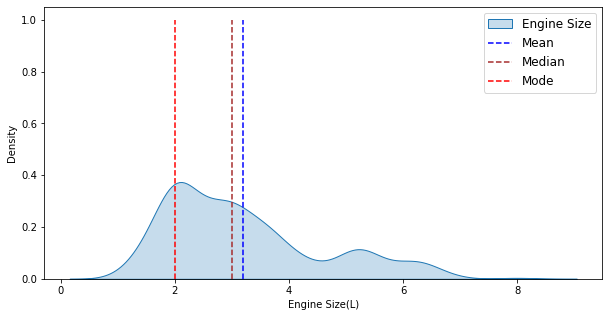

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(engine_arr, shade=True)
plt.vlines(x=np.mean(engine_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(engine_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(engine_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Engine Size', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

It can be seen that the distribution is `right skewed` because it is more concentrated on the left and has a long tail on the right. Based on the visualization, the `median`, `mean`, and `mode` are not always the same. In this case, the median can be a more appropriate measure to describe the central tendency of the data.

To compare the distribution of data A to data B, we can use an overlapping KDE plot.

For example, if we want to compare the distribution of Engine Size between Honda and Hyundai.

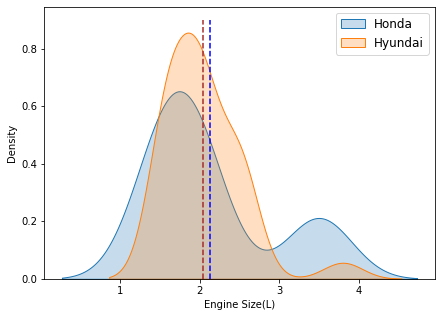

In [15]:
# KDE Plot
honda = df[df['Make'] == 'Honda']
hyundai = df[df['Make'] == 'Hyundai']
plt.figure(figsize=(7,5))
sns.kdeplot(honda['Engine Size(L)'], shade=True)
sns.kdeplot(hyundai['Engine Size(L)'], shade=True)
plt.legend(['Honda','Hyundai'], fontsize=12)
plt.vlines(x=honda['Engine Size(L)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=hyundai['Engine Size(L)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Correlation is a measure of dependency between attributes in the data. Correlation is often used to assess whether an attribute has a strong linear relationship with another attribute.

There are several types of correlation that can be used for different types of data. ***Pearson correlation*** is commonly used to measure correlation between numerical attributes.

In [16]:
df.corr(method='pearson')

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,0.971671,-0.927705,-0.490473
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,-0.520437,0.502625,1.000000


From the Pearson correlation above, we can identify which pairs of attributes have a high relationship (dark green color). To illustrate this, below are two scatter plots showing the linear relationship with `Cylinders`:

* `Engine Size(L)`: 0.92
* `CO2 Rating`: -0.77

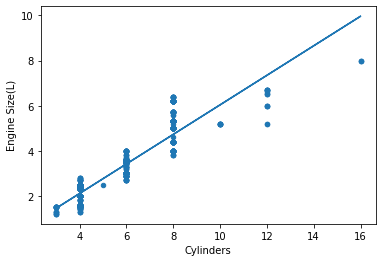

In [21]:
w = df["Cylinders"]
z = df["Engine Size(L)"]
df.plot.scatter(x="Cylinders", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

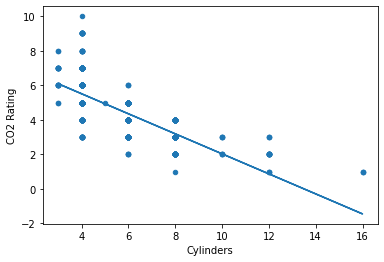

In [22]:
w = df["Cylinders"]
z = df["CO2 Rating"]
df.plot.scatter(x="Cylinders", y="CO2 Rating", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

<AxesSubplot:xlabel='count', ylabel='Make'>

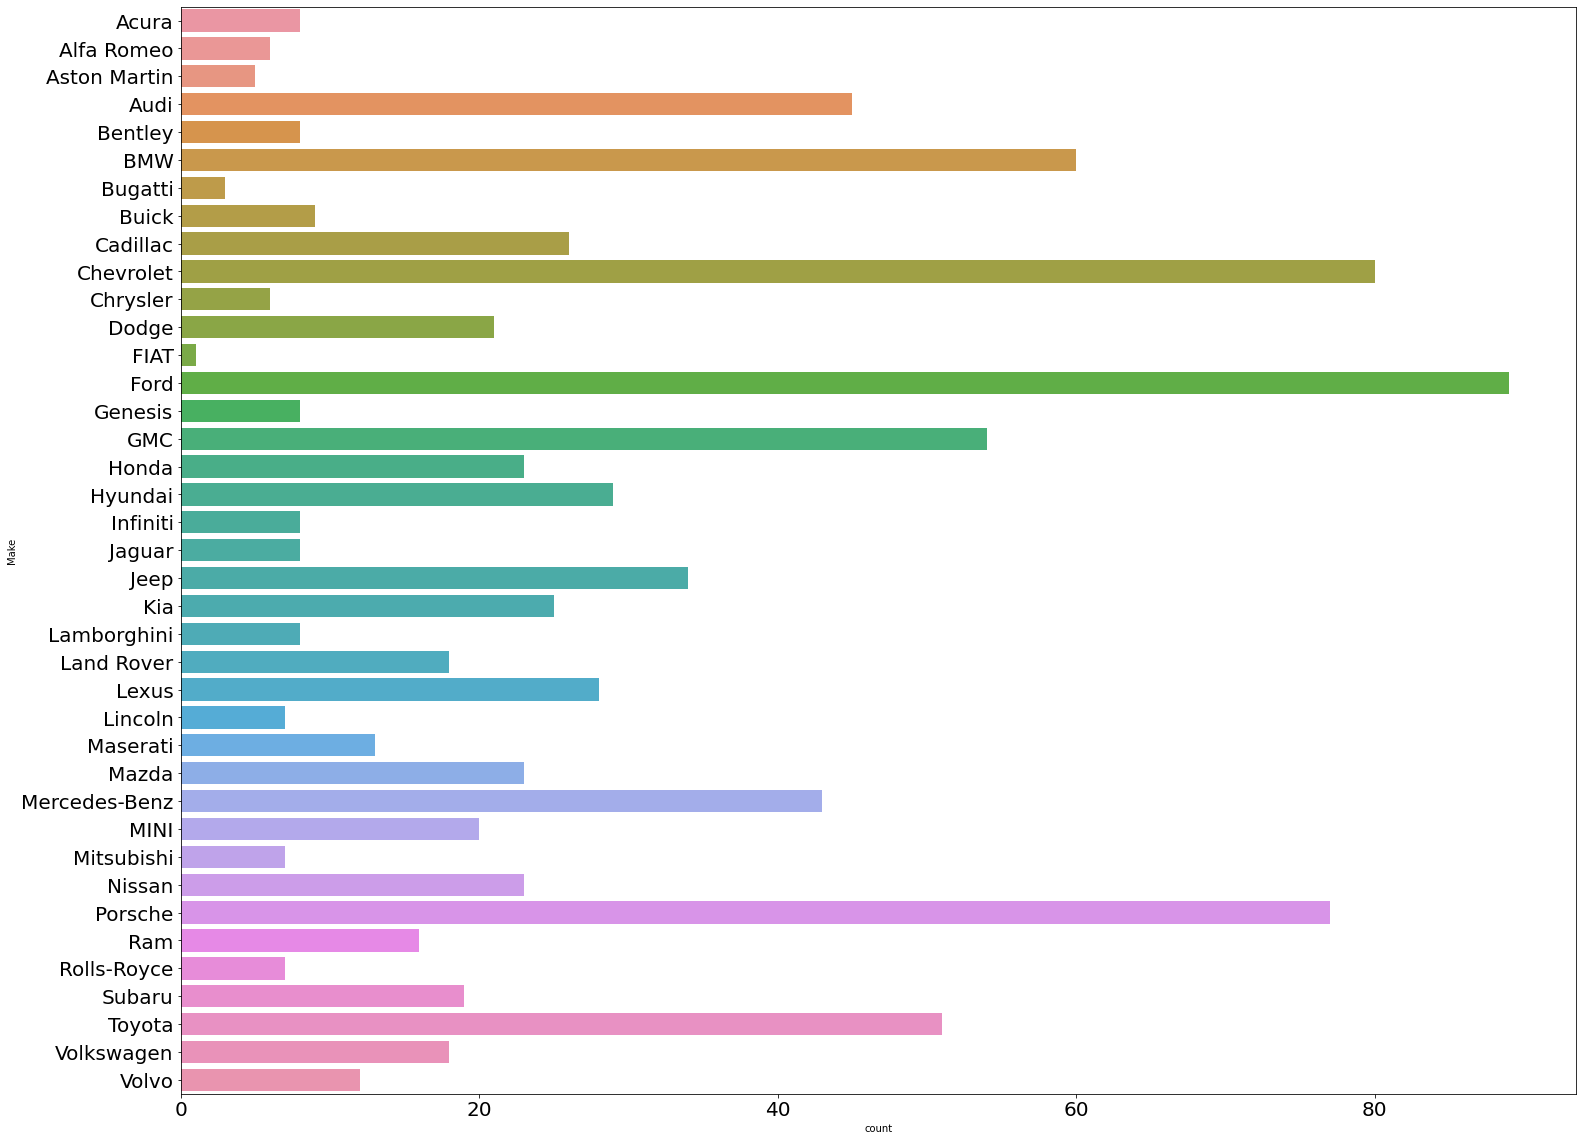

In [23]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

plt.xticks(size=20)
sns.countplot(y='Make', data=df)

As we can see from the count plot above, Ford is the most commonly used car brand in Canada.

<AxesSubplot:xlabel='count', ylabel='Transmission'>

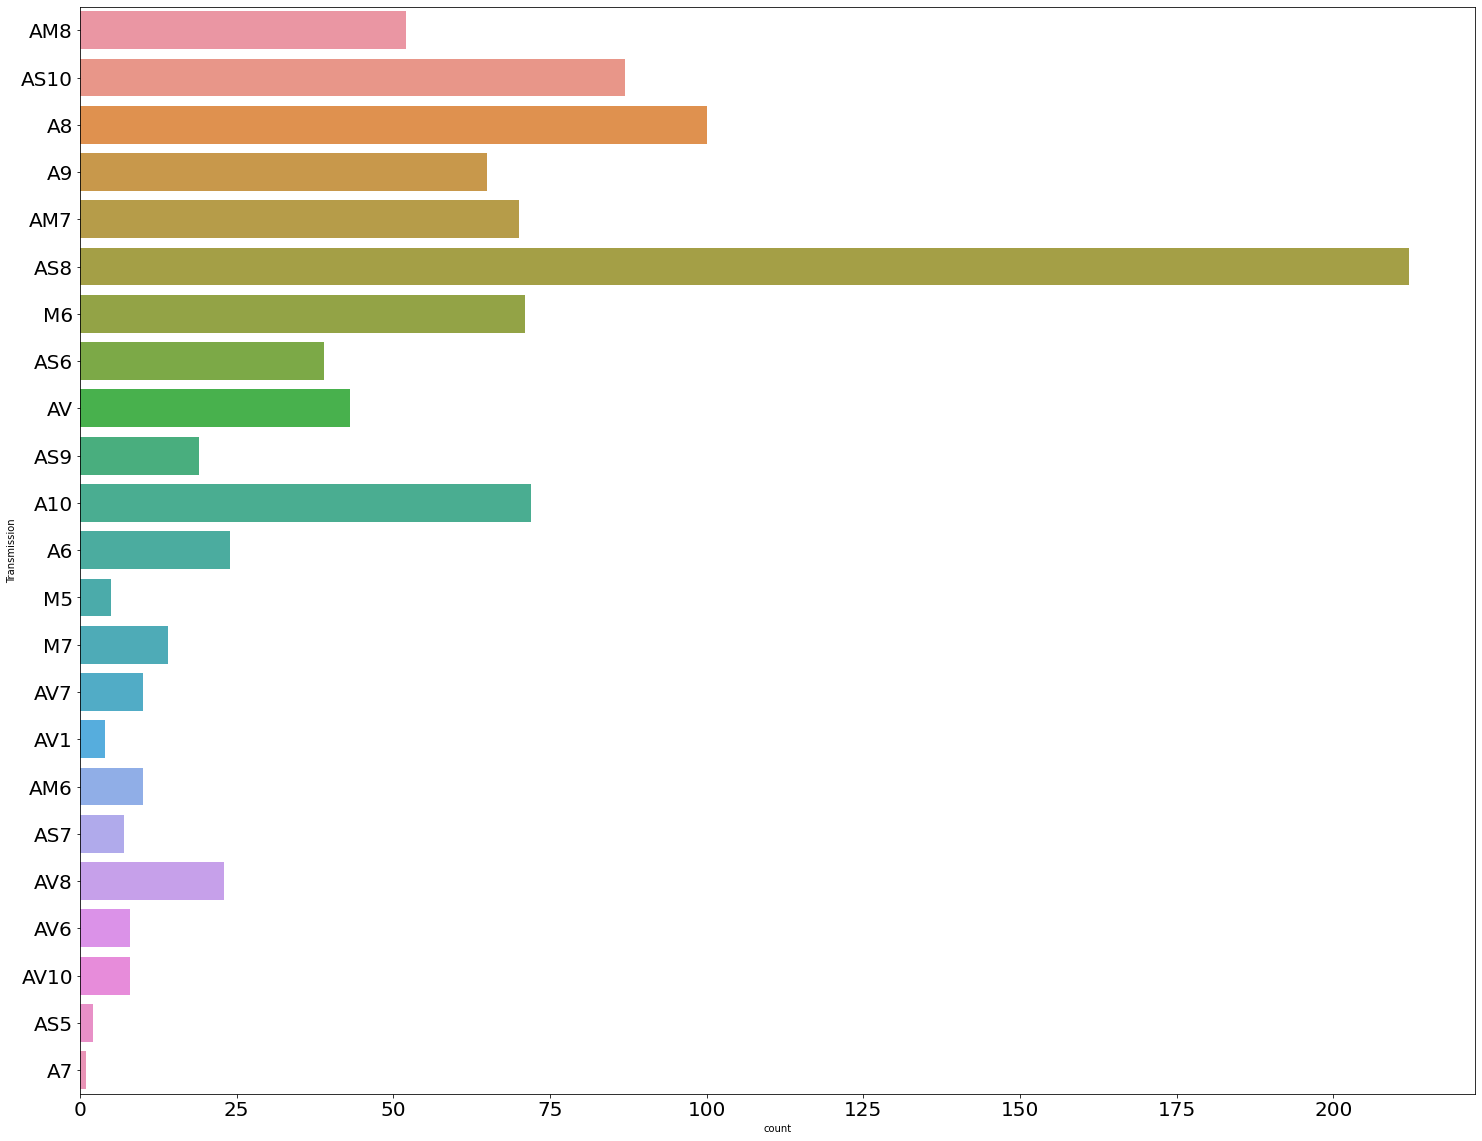

In [24]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

plt.xticks(size=20)
sns.countplot(y='Transmission', data=df)

From the count plot, the AS8 transmission is the most commonly used, while the A7 transmission is the least used.

<AxesSubplot:xlabel='Make', ylabel='Engine Size(L)'>

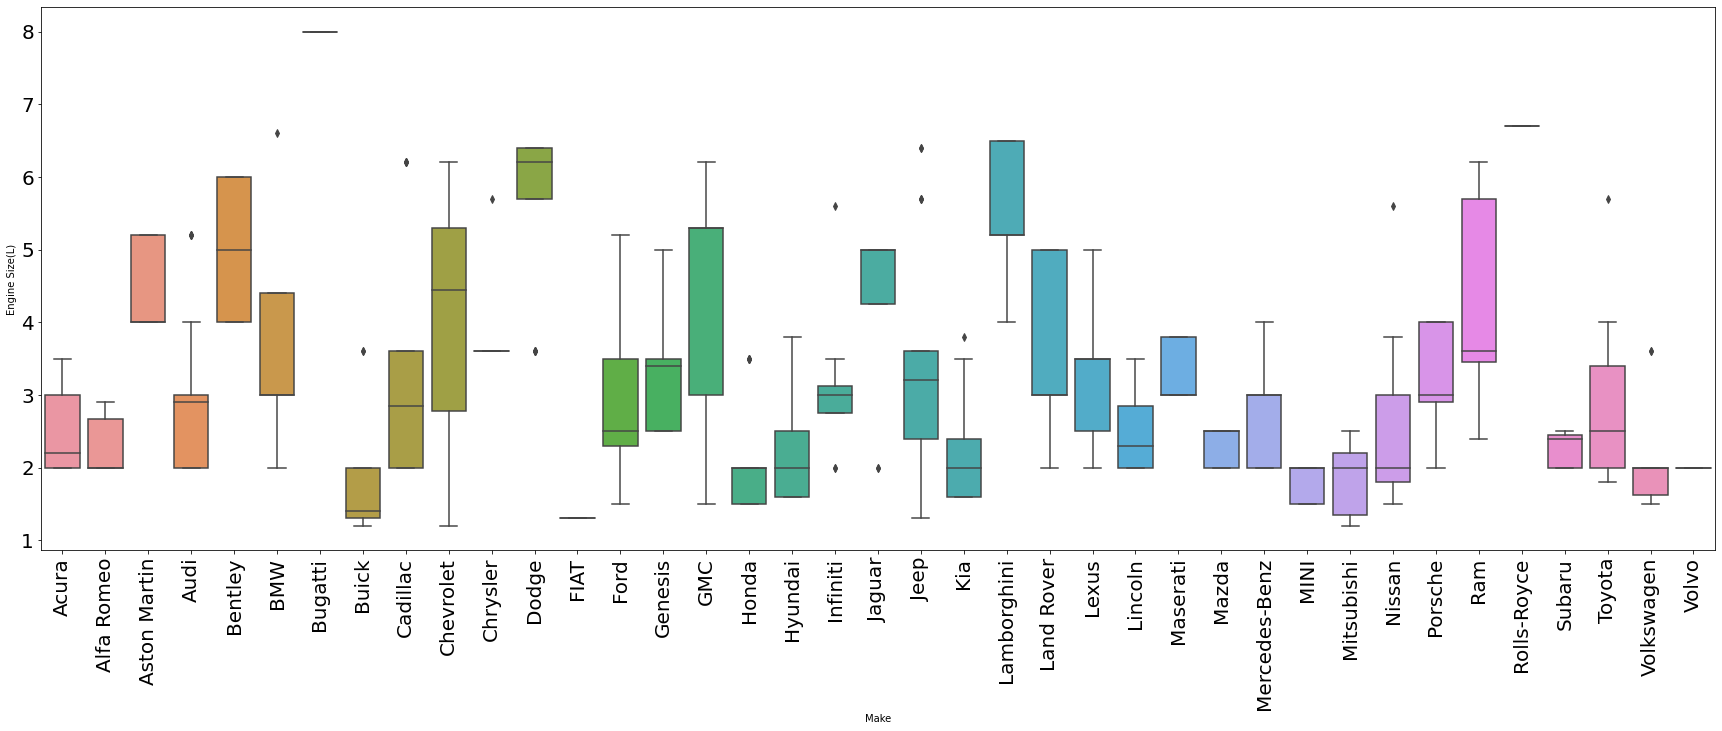

In [25]:
# Menampilkan boxplot Make terhadap Engine Size(L)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Make', y='Engine Size(L)')

### **Descriptive Statistics** of `CO2 Emissions(g/km)`

In [76]:
engine_arr_a = df['CO2 Emissions(g/km)']
minimal = np.min(engine_arr_a)
maksimal = np.max(engine_arr_a)
q75, q50, q25 = np.percentile(engine_arr_a, [75,50,25])
stats_a = [
    ['Mean', np.mean(engine_arr_a)],
    ['Median', np.median(engine_arr_a)],
    ['Mode', scp.mode(engine_arr_a)[0][0]],
    ['Standard Deviation', np.std(engine_arr_a)],
    ['Variance', np.var(engine_arr_a)],
    ['Minimum', minimal],
    ['Maximum', maksimal],
    ['Range', maksimal - minimal],
    ['Q3', q75],
    ['Q2', q50],
    ['Q1', q25],
    
]

pd.DataFrame(stats_a, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,259.172304
1,Median,257.000000
2,Mode,275.000000
3,Standard Deviation,64.409079
4,Variance,4148.529508
5,Minimum,94.000000
6,Maximum,608.000000
7,Range,514.000000
8,Q3,300.750000
9,Q2,257.000000


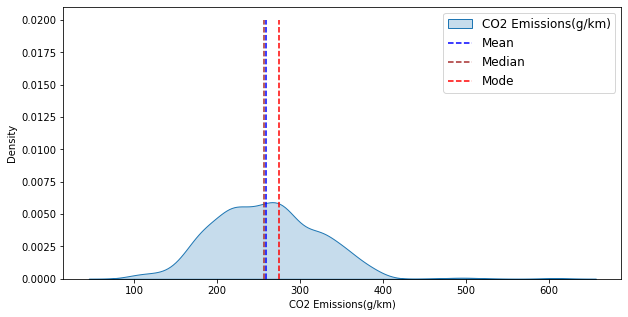

In [39]:
plt.figure(figsize=(10,5))
sns.kdeplot(engine_arr_a, shade=True)
plt.vlines(x=np.mean(engine_arr_a), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=np.median(engine_arr_a), ymin=0, ymax=0.02, color='brown', linestyle='--')
plt.vlines(x=scp.mode(engine_arr_a)[0][0], ymin=0, ymax=0.02, color='red', linestyle='--')
plt.legend(['CO2 Emissions(g/km)', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

From this graphic, we can also determine the best measure of central tendency for `CO2 Emissions (g/km)`. The mean is the best measure of central tendency for `CO2 Emissions (g/km)` because the data appears balanced around the center and includes all values.

This is the Pearson correlation heatmap, which shows the correlation between different variables in the dataset.

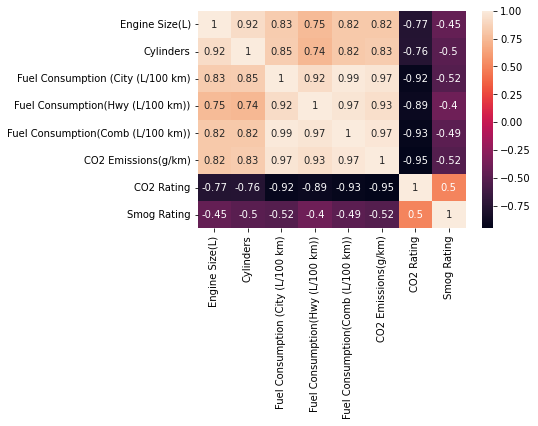

In [45]:
sns.heatmap(df.corr(method='pearson', min_periods=1), annot = True)
plt.show()

### **Data Visualization**

We can use a bar plot to visualize which car has the largest or smallest engine size.

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Make'>

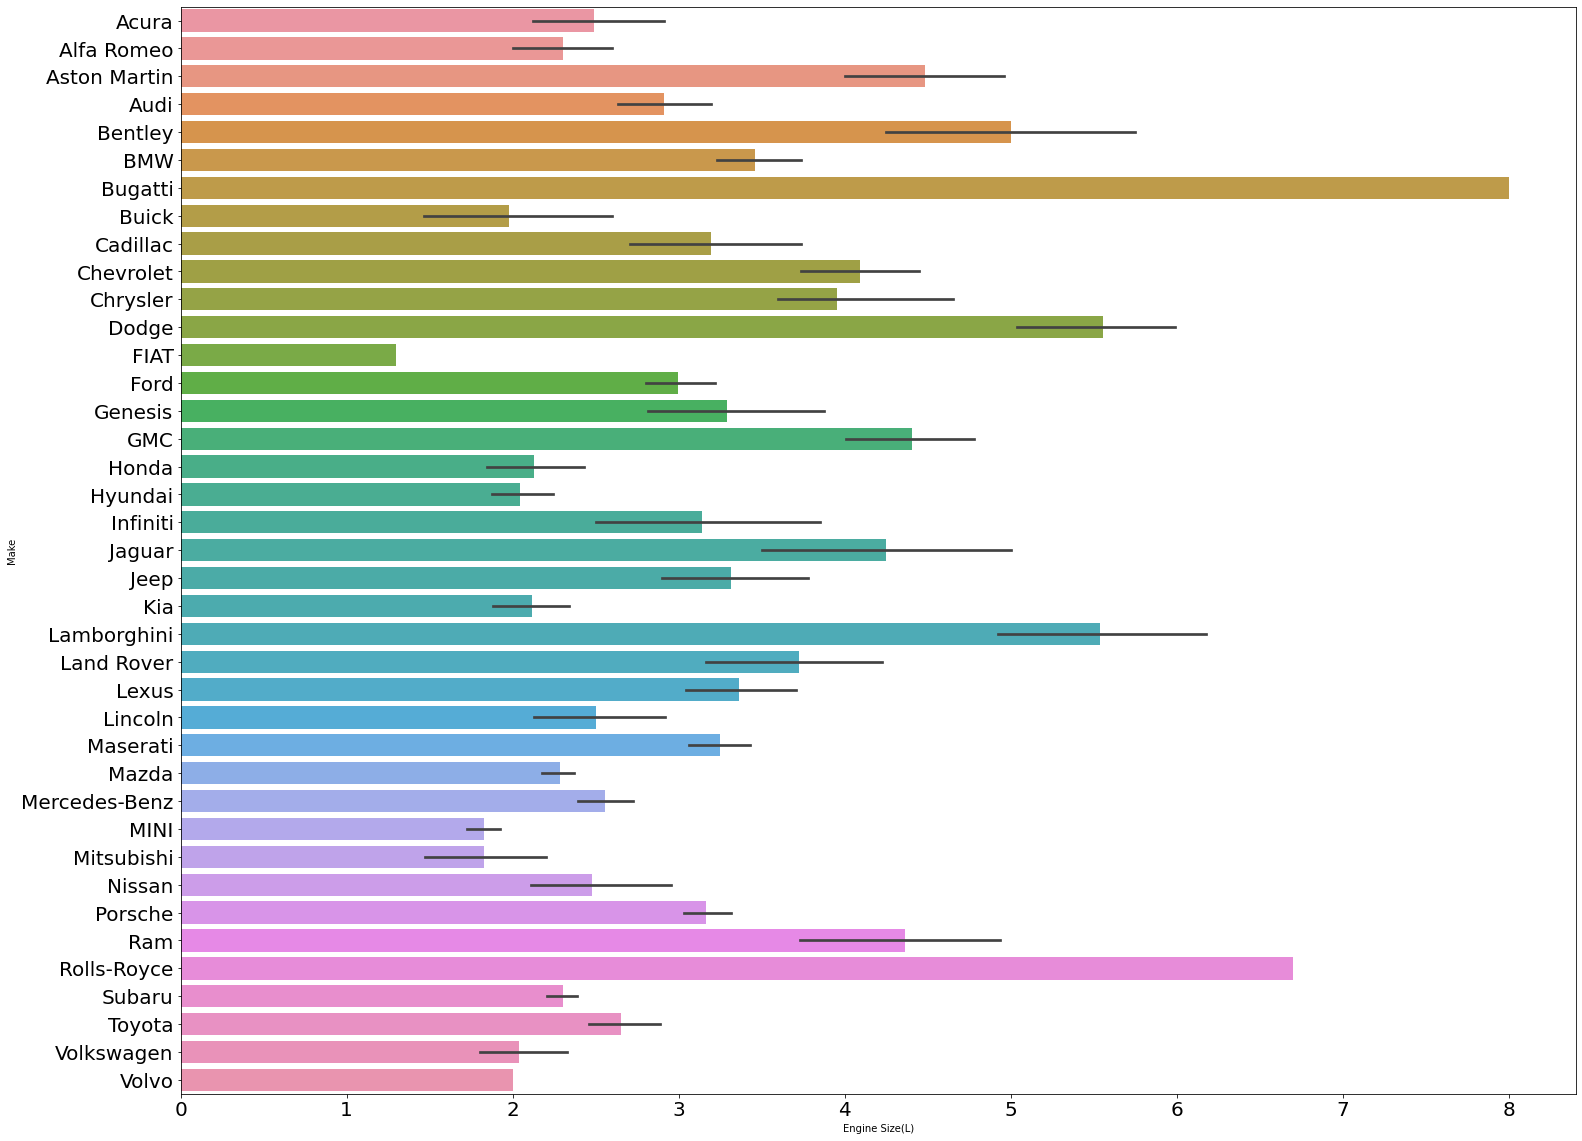

In [13]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
sns.barplot(data = df, y = 'Make', x = 'Engine Size(L)')


We can use a pie chart to visualize the percentage of cars that have a smog rating above a specific value, categorized by the region of the car brand.

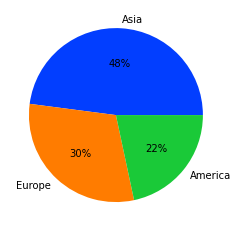

In [30]:
smog_7 = df[df['Smog Rating'] >= 7]
region = smog_7['Region'].unique()
count_region = []
for i in region:
    count_region.append(smog_7['Region'].value_counts()[i])

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(count_region, labels=region, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

We can use box plot to see outlier

<AxesSubplot:xlabel='Transmission', ylabel='Engine Size(L)'>

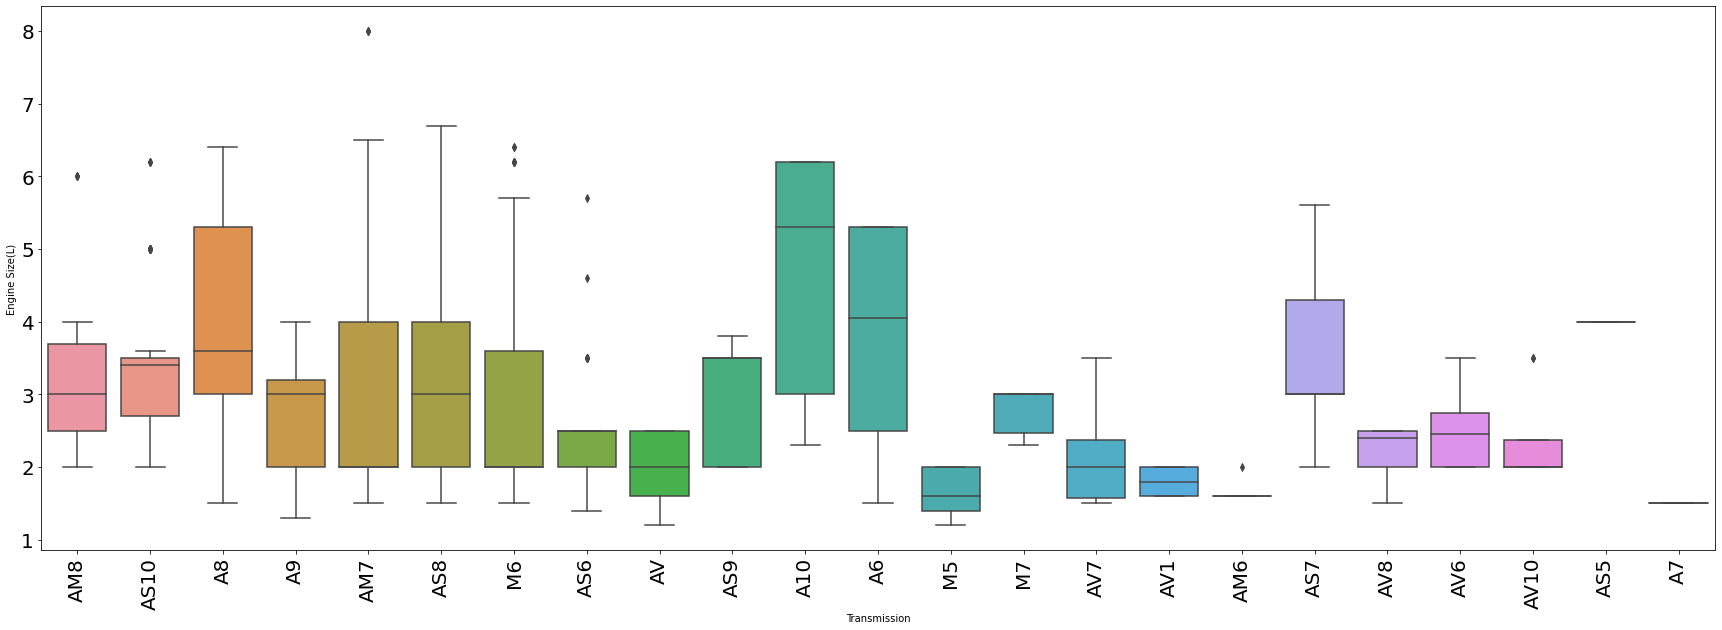

In [32]:
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Transmission', y='Engine Size(L)')

We can use a scatter plot to visualize the correlation between two numeric values, in this case, engine size and fuel consumption. The Pearson correlation coefficient is 0.82, which is high enough to indicate a strong positive correlation. This means that as engine size increases, fuel consumption tends to increase as well.

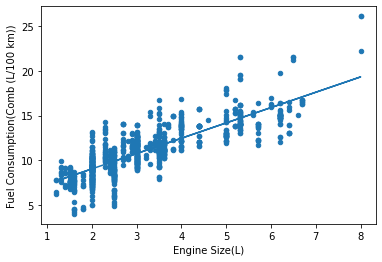

In [34]:
engine_size = df["Engine Size(L)"]
fuel_consumption = df["Fuel Consumption(Comb (L/100 km))"]
df.plot.scatter(x="Engine Size(L)", y="Fuel Consumption(Comb (L/100 km))", figsize=(6,4))
b_a, m_a = polyfit(engine_size, fuel_consumption, 1)
plt.plot(engine_size, b_a + m_a * engine_size, '-')
plt.show()

We can use KDE plot to visualize data distribution with a continuous probability density curve. By looking at the KDE plot below, it is evident that CO2 emissions for BMW are more dispersed compared to Mercedes-Benz. This implies that the CO2 emissions from Mercedes-Benz cars do not vary significantly between different models. Meanwhile, BMW cars exhibit a wider range of CO2 emissions. Additionally, the average CO2 emissions produced by Mercedes-Benz cars are lower than those produced by BMW cars.

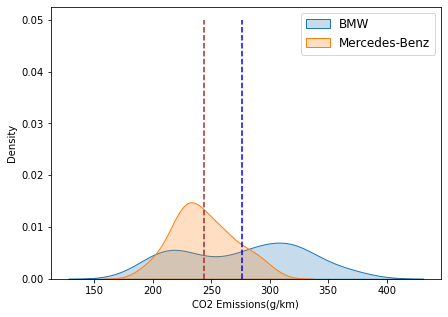

In [41]:
bmw = df[df['Make'] == 'BMW']
mercedes = df[df['Make'] == 'Mercedes-Benz']
plt.figure(figsize=(7,5))
sns.kdeplot(bmw['CO2 Emissions(g/km)'], shade=True)
sns.kdeplot(mercedes['CO2 Emissions(g/km)'], shade=True)
plt.legend(['BMW','Mercedes-Benz'], fontsize=12)
plt.vlines(x=bmw['CO2 Emissions(g/km)'].mean(), ymin=0, ymax=0.05, color='blue', linestyle='--')
plt.vlines(x=mercedes['CO2 Emissions(g/km)'].mean(), ymin=0, ymax=0.05, color='brown', linestyle='--')
plt.show()

We can use a bar plot to compare the average `Fuel Consumption(Comb (L/100 km))` of various Asian car brands to determine which one is the most economical (i.e., has the lowest values).

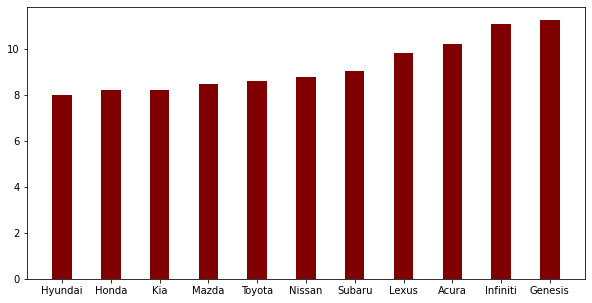

In [75]:
asian_data = df[df['Region'] == 'Asia']

unique_brand = asian_data['Make'].unique()
values = []
for i in unique_brand:
    values.append(asian_data[asian_data['Make'] == i]['Fuel Consumption(Comb (L/100 km))'].mean())
fig = plt.figure(figsize = (10, 5))
new_asian = pd.DataFrame({'Brand':unique_brand, 'Fuel Consumption':values})
new_asian.sort_values(by='Fuel Consumption', inplace=True)
plt.bar(new_asian['Brand'], new_asian['Fuel Consumption'], data = asian_data, color ='maroon', width = 0.4)
plt.show()

In [78]:
engine_arr_b = df[df['Make'] == 'Hyundai']['Fuel Consumption(Comb (L/100 km))']
minimal_a = np.min(engine_arr_b)
maksimal_a = np.max(engine_arr_b)
q75, q50, q25 = np.percentile(engine_arr_b, [75,50,25])
stats_a = [
    ['Mean', np.mean(engine_arr_b)],
    ['Median', np.median(engine_arr_b)],
    ['Mode', scp.mode(engine_arr_b)[0][0]],
    ['Standard Deviation', np.std(engine_arr_b)],
    ['Variance', np.var(engine_arr_b)],
    ['Minimum', minimal_a],
    ['Maximum', maksimal_a],
    ['Range', maksimal_a - minimal_a],
    ['Q3', q75],
    ['Q2', q50],
    ['Q1', q25],
    
]

pd.DataFrame(stats_a, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,7.989655
1,Median,7.800000
2,Mode,6.400000
3,Standard Deviation,1.924138
4,Variance,3.702307
5,Minimum,4.000000
6,Maximum,11.100000
7,Range,7.100000
8,Q3,9.500000
9,Q2,7.800000


From this data, we can see that the standard deviation is low, indicating that the fuel consumption of each Hyundai car model does not differ significantly from one another. The minimum value is 4, the maximum is 11.1, and the standard deviation is 1.92. This results in a low mean fuel consumption value for the Hyundai brand.